# This notebook can be ran as slides from your browser by:
* Downloading the notebook from github
* Moving to the proper folder in terminal/console
* Entering
 * jupyter nbconvert Data_verify_clean.ipynb --to slides --post serve

## Importing the early dependancies and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    # rating_update is the original data 'beer_review.csv' with beer_style updated
    # The updates change beer_style to match the styles that are given in 'beer_description.csv'

    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/rating_update.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings


In [3]:
beer_ratings = get_data()

# The purpose of this notebook will be to:
* Verify all values fall into appropriate ranges
* Find values that may cause issues
* Ameliorate, or remove bad values if necessary

# The hunt for bad review_profilename

In [4]:
beer_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


The RangeIndex gives use a total of 1,586,614 observations. We have 1,586,266 non-null object observations in review_profilename

In [5]:
profilename_array = [name for name in beer_ratings.review_profilename.unique()]

Building an array of the unique/distinct profile names

In [6]:
print(True in [name == 'nan' for name in profilename_array])

False


Checking for 'nan' values in the array

In [7]:
print(True in [name == 'nan' for name in list(map(str, profilename_array))])

True


* Profile names should be type str. We're going to map the array so all values are type string. 
* After doing this we rechecked for 'nan' and find that there are nan values. 
In python nan can be a float value. So when checking for literal 'nan' it looked for an exact str match. 

Checking for these values as an array can save time before doing a large conversion over a dataframe.

In [8]:
beer_ratings['review_profilename'] = beer_ratings['review_profilename'].astype('str')
print(beer_ratings[beer_ratings['review_profilename'] == 'nan'].head(5))

       brewery_id                                brewery_name  review_time  \
8869          395  Bluegrass Brewing Co. - East St. Matthew's   1205005717   
22125        1199                    Founders Brewing Company   1231726538   
31822        1199                    Founders Brewing Company   1246501387   
33500        1199                    Founders Brewing Company   1238871081   
33678        1199                    Founders Brewing Company   1227224257   

       review_overall  review_aroma  review_appearance review_profilename  \
8869              4.0           4.0                3.5                nan   
22125             4.0           4.5                4.5                nan   
31822             4.0           4.0                4.0                nan   
33500             5.0           5.0                5.0                nan   
33678             5.0           5.0                5.0                nan   

                    beer_style  review_palate  review_taste  \
8869 

In [9]:
bad_ProfileIndices = beer_ratings.loc[beer_ratings['review_profilename'] == 'nan',:]['review_profilename'].index

Collect the indices of the 'nan' entries in review_profilename

In [10]:
for index in bad_ProfileIndices :
    beer_ratings.loc[index,'review_profilename'] = 'OTHER'

Set the values as 'OTHER'. In instances where we're not using the profile names we still have the rest of the data. In cases that we're going to use profile names we can find the old 'nan' values under 'OTHER'

In [11]:
print(beer_ratings[beer_ratings['review_profilename'] == 'OTHER'].head(5))

       brewery_id                                brewery_name  review_time  \
8869          395  Bluegrass Brewing Co. - East St. Matthew's   1205005717   
22125        1199                    Founders Brewing Company   1231726538   
31822        1199                    Founders Brewing Company   1246501387   
33500        1199                    Founders Brewing Company   1238871081   
33678        1199                    Founders Brewing Company   1227224257   

       review_overall  review_aroma  review_appearance review_profilename  \
8869              4.0           4.0                3.5              OTHER   
22125             4.0           4.5                4.5              OTHER   
31822             4.0           4.0                4.0              OTHER   
33500             5.0           5.0                5.0              OTHER   
33678             5.0           5.0                5.0              OTHER   

                    beer_style  review_palate  review_taste  \
8869 

In [12]:
beer_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586614 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


All of the review_profilename anomolies have been ameliorated. Onto the next section...

It should be mentioned that it may be possible to map a profile name to these 'OTHER' accounts. In this project we won't focus on this

# The hunt for bad brewery_name values

In [13]:
beer_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586614 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


## We'll follow the same procedure as we started with last time

In [14]:
brewery_name_asStr = list(map(str, beer_ratings.brewery_name.unique()))

In [15]:
print(True in [name == 'nan' for name in brewery_name_asStr])

True


In [16]:
beer_ratings['brewery_name'] = beer_ratings['brewery_name'].astype('str')

## Check what what brewery_id's we're dealing with

## We may be able to map good values to these bad values

In [17]:
beer_ratings[beer_ratings['brewery_name'] == 'nan'].brewery_id.unique()

array([1193,   27])

In [18]:
print(beer_ratings[beer_ratings['brewery_id'] == 27].brewery_name.unique())
print(beer_ratings[beer_ratings['brewery_id'] == 1193].brewery_name.unique())

['nan']
['nan']


### Checking on BeerAdvocate using those ID's doesn't fetch any brewery.

## We'll check by beer name next:

In [19]:
beer_ratings[beer_ratings['brewery_id'] == 27]['beer_name'].unique()

array(['Hard Hat American Beer', 'Side Pocket', 'Breakaway IPA',
       'Caboose Oatmeal Stout'], dtype=object)

In [20]:
beer_ratings[beer_ratings['brewery_id'] == 1193]['beer_name'].unique()

array(['Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABISCH GMUND',
       'Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER',
       'Engel Gold WRONG BREWERY SEE CRAILSHEIMER',
       'Engel Landbier WRONG BREWERY SEE CRAILSHEIMER',
       'Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER',
       'Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER',
       'Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER'], dtype=object)

# The hunt for beer_abv null (bad) values

In [21]:
beer_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586614 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586614 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [ ]:
## Alternative way to look for bad values

In [22]:
beer_ratings.beer_abv.unique()

array([  5.00000000e+00,   6.20000000e+00,   6.50000000e+00,
         7.70000000e+00,   4.70000000e+00,   3.50000000e+00,
         7.20000000e+00,   5.60000000e+00,   7.40000000e+00,
         5.50000000e+00,   5.80000000e+00,   8.10000000e+00,
         6.10000000e+00,              nan,   8.80000000e+00,
         5.70000000e+00,   7.00000000e+00,   6.30000000e+00,
         3.90000000e+00,   6.70000000e+00,   6.00000000e+00,
         6.80000000e+00,   5.40000000e+00,   9.50000000e+00,
         4.80000000e+00,   5.20000000e+00,   9.40000000e+00,
         7.60000000e+00,   8.50000000e+00,   4.00000000e+00,
         4.50000000e+00,   4.20000000e+00,   9.00000000e+00,
         8.00000000e+00,   4.10000000e+00,   1.04000000e+01,
         5.10000000e+00,   1.00000000e+01,   3.80000000e+00,
         7.10000000e+00,   4.60000000e+00,   7.50000000e+00,
         1.00000000e-01,   8.40000000e+00,   4.40000000e+00,
         4.90000000e+00,   2.20000000e+00,   2.80000000e+00,
         5.30000000e+00,

## Changing the values, same as above in dataframe astype manipulation, to do some comparisons

In [45]:
beer_ratings['beer_abv'] = beer_ratings.beer_abv.values.astype('str')

## Building sets of:
* beer_names that have 'nan' values
* beer_names that don't have 'nan values

Comparing between the two sets will allow us to find beers that we can map their ABV to the 'nan' values

In [49]:
bad_ABV_names = set(beer_ratings[beer_ratings['beer_abv'] == 'nan']['beer_name'].unique())

In [48]:
good_ABV_names = set(beer_ratings[beer_ratings['beer_abv'] != 'nan']['beer_name'].unique())

In [51]:
len(good_ABV_names & bad_ABV_names)

1338

In [27]:
len(beer_ratings[beer_ratings.beer_abv =='nan'].beer_name)

67785

In [53]:
len(bad_ABV_names)

14110

In [56]:
len(good_ABV_names - bad_ABV_names)

42747

There are a total of 67,785 observations in the beer_abv column that have 'nan' values.
Of these 67,785 observations there are 14,110 individual specific beers with 'nan' values in beer_abv

In [29]:
max(beer2[beer2.abv !='nan'].beer_abv)

57.7

In [30]:
beer2[beer2[beer2.abv !='nan'] != 57.7].beer_abv.mean()

7.042353400114299

In [31]:
beer2[beer2.abv !='nan'].beer_abv.mean()

7.042386753208429

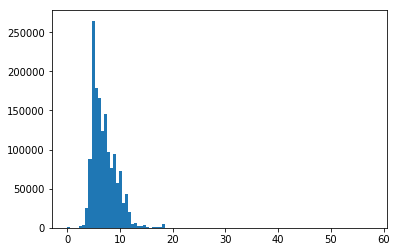

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(beer2[beer2.abv !='nan'].beer_abv, bins = 100)
plt.show()

In [33]:
beer2.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_beerid',
       'abv'],
      dtype='object')

In [34]:
beer1 = beer2.loc[:,['beer_name', 'abv']]

In [35]:
beer1['count'] = 0

In [36]:
beer1 = beer1.groupby(['beer_name','abv'], axis=0).count()

In [37]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [38]:
beer2 = beer2[beer2.abv !='nan']

In [39]:
len(beer2[beer2.abv !='nan'].beer_abv.values)

1518829

In [40]:
beer2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518829 entries, 0 to 1586613
Data columns (total 14 columns):
brewery_id            1518829 non-null int64
brewery_name          1518829 non-null object
review_time           1518829 non-null int64
review_overall        1518829 non-null float64
review_aroma          1518829 non-null float64
review_appearance     1518829 non-null float64
review_profilename    1518829 non-null object
beer_style            1518829 non-null object
review_palate         1518829 non-null float64
review_taste          1518829 non-null float64
beer_name             1518829 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1518829 non-null int64
abv                   1518829 non-null object
dtypes: float64(6), int64(3), object(5)
memory usage: 173.8+ MB


In [41]:
beer2 = beer2[beer2.beer_abv < 15] # Arbitrary number, cut off is when beer is basically carbonated malt wine...

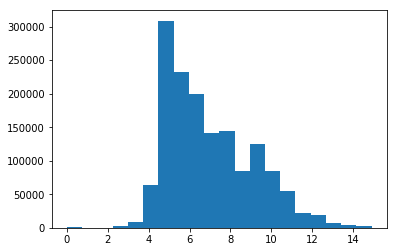

In [42]:
import matplotlib.pyplot as plt

plt.hist(beer2.beer_abv.values, bins = 20)
plt.show()

In [59]:
beer2[beer2.beer_abv < 0]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,abv


## Don't forget in the verify section to check if there are any values greater or less than 0,5